In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [14]:
N = 10
k = 1.38*10**(-23)
m = 6.645*10**(-27)
T = 5000
dt = 0.0001

xmin = 0.
xmax = 10.
ymin = 0.
ymax = 10.

In [15]:
def f():
    global T,N,k,m,dt, xmin, xmax, ymin, ymax
    Vav = np.sqrt(3*k*T/m/N)
    vx = np.random.uniform(-Vav,Vav,N)
    vy = np.sqrt((-1)*(vx**2 - Vav**2))
    x = np.random.uniform(xmin, xmax, N)
    y = np.random.uniform(ymin, ymax, N)
    yield (x,y)
    while(True):
        for i in range(N):    
            if (x[i] <= xmin or x[i] >= xmax):
                vx[i] = (-1)*vx[i]
                x[i] += vx[i]*dt    
            else:
            	x[i] += vx[i]*dt
            
            if (y[i] <= ymin or y[i] >= ymax):
                vy[i] = (-1)*vy[i]
            y[i] += vy[i]*dt
        yield (x,y)

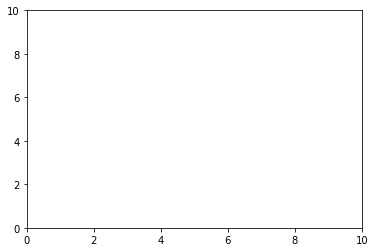

In [17]:
fig, ax = plt.subplots()
ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))
line = ax.scatter([], [], lw = 2)
gen = f()

In [18]:
def init():
    global xmin, xmax, ymin, ymax
    ax.clear()
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    line = ax.scatter([], [], lw = 2)
    return line,

In [19]:
def animate(i):
    global xmin, xmax, ymin, ymax, gen
    xy = next(gen)
    ax.clear()
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    line = ax.scatter([xy[0]], [xy[1]], lw = 2)
    return line,

In [20]:
ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=10)

HTML(ani.to_jshtml())